In [28]:
%cd "/home/jspijkervet/git/clmr/"

/home/jspijkervet/git/clmr


In [60]:
import os
import torch
import torchaudio
import numpy as np
from collections import defaultdict
from utils import parse_args
from data import get_dataset
from model import load_encoder

In [148]:
args = parse_args("./config/config.yaml", addit=[])
args.world_size = 1
args.supervised = False
args.dataset = "msd"
args.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

args.model_path = "./logs/51"
args.epoch_num = 3000
args.finetune_model_path = "./results/51"
args.finetune_epoch_num = 132

In [149]:
# data loaders
(
    train_loader,
    train_dataset,
    val_loader,
    val_dataset,
    test_loader,
    test_dataset,
) = get_dataset(args, pretrain=True, download=args.download)

[train dataset (msd_22050)]
[million_song_dataset train]: Loaded 201676 audio segments
[valid dataset (msd_22050)]
[million_song_dataset valid]: Loaded 11774 audio segments
[test dataset (msd_22050)]
[million_song_dataset test]: Loaded 28434 audio segments


In [150]:
# load pre-trained encoder
encoder = load_encoder(args, reload=True)
encoder.eval()
encoder = encoder.to(args.device)

model = None
if not args.supervised:
    finetuned_head = torch.nn.Sequential(
        torch.nn.Linear(args.n_features, args.n_classes)
    )

    finetuned_head.load_state_dict(
        torch.load(
            os.path.join(
                args.finetune_model_path,
                f"finetuner_checkpoint_{args.finetune_epoch_num}.pt",
            )
        )
    )
    finetuned_head = finetuned_head.to(args.device)

# initialize TensorBoard

args.current_epoch = args.epoch_num

### SampleCNN ###
### RELOADING CLMR MODEL FROM CHECKPOINT 3000 ###


In [152]:
tag_classes = defaultdict(list)
predictions = []
n = 10 # add every n
with torch.no_grad():
    for step, (track_id, clip_id, segment, fp, label) in enumerate(test_dataset.index):
        if step % n == 0:
            audio = test_dataset.get_full_size_audio(fp)
            audio = audio.to(args.device)
            h = encoder(audio)
            output = finetuned_head(h)
            output = torch.nn.functional.softmax(output, dim=1)

            h = h.mean(dim=0)
            output = output.mean(dim=0) # take mean predictions of whole track, i.e., over batch dim.
            predictions.append([output.cpu().numpy().tolist(), h.cpu().numpy().tolist(), track_id, clip_id, segment, fp, label])

            print(step, "/", len(test_dataset))        

0 / 28434
10 / 28434
20 / 28434
30 / 28434
40 / 28434
50 / 28434
60 / 28434
70 / 28434
80 / 28434
90 / 28434
100 / 28434
110 / 28434
120 / 28434
130 / 28434
140 / 28434
150 / 28434
160 / 28434
170 / 28434
180 / 28434
190 / 28434
200 / 28434
210 / 28434
220 / 28434
230 / 28434
240 / 28434
250 / 28434
260 / 28434
270 / 28434
280 / 28434
290 / 28434
300 / 28434
310 / 28434
320 / 28434
330 / 28434
340 / 28434
350 / 28434
360 / 28434
370 / 28434
380 / 28434
390 / 28434
400 / 28434
410 / 28434
420 / 28434
430 / 28434
440 / 28434
450 / 28434
460 / 28434
470 / 28434
480 / 28434
490 / 28434
500 / 28434
510 / 28434
520 / 28434
530 / 28434
540 / 28434
550 / 28434
560 / 28434
570 / 28434
580 / 28434
590 / 28434
600 / 28434
610 / 28434
620 / 28434
630 / 28434
640 / 28434
650 / 28434
660 / 28434
670 / 28434
680 / 28434
690 / 28434
700 / 28434
710 / 28434
720 / 28434
730 / 28434
740 / 28434
750 / 28434
760 / 28434
770 / 28434
780 / 28434
790 / 28434
800 / 28434
810 / 28434
820 / 28434
830 / 28434
840

6390 / 28434
6400 / 28434
6410 / 28434
6420 / 28434
6430 / 28434
6440 / 28434
6450 / 28434
6460 / 28434
6470 / 28434
6480 / 28434
6490 / 28434
6500 / 28434
6510 / 28434
6520 / 28434
6530 / 28434
6540 / 28434
6550 / 28434
6560 / 28434
6570 / 28434
6580 / 28434
6590 / 28434
6600 / 28434
6610 / 28434
6620 / 28434
6630 / 28434
6640 / 28434
6650 / 28434
6660 / 28434
6670 / 28434
6680 / 28434
6690 / 28434
6700 / 28434
6710 / 28434
6720 / 28434
6730 / 28434
6740 / 28434
6750 / 28434
6760 / 28434
6770 / 28434
6780 / 28434
6790 / 28434
6800 / 28434
6810 / 28434
6820 / 28434
6830 / 28434
6840 / 28434
6850 / 28434
6860 / 28434
6870 / 28434
6880 / 28434
6890 / 28434
6900 / 28434
6910 / 28434
6920 / 28434
6930 / 28434
6940 / 28434
6950 / 28434
6960 / 28434
6970 / 28434
6980 / 28434
6990 / 28434
7000 / 28434
7010 / 28434
7020 / 28434
7030 / 28434
7040 / 28434
7050 / 28434
7060 / 28434
7070 / 28434
7080 / 28434
7090 / 28434
7100 / 28434
7110 / 28434
7120 / 28434
7130 / 28434
7140 / 28434
7150 / 28434

12590 / 28434
12600 / 28434
12610 / 28434
12620 / 28434
12630 / 28434
12640 / 28434
12650 / 28434
12660 / 28434
12670 / 28434
12680 / 28434
12690 / 28434
12700 / 28434
12710 / 28434
12720 / 28434
12730 / 28434
12740 / 28434
12750 / 28434
12760 / 28434
12770 / 28434
12780 / 28434
12790 / 28434
12800 / 28434
12810 / 28434
12820 / 28434
12830 / 28434
12840 / 28434
12850 / 28434
12860 / 28434
12870 / 28434
12880 / 28434
12890 / 28434
12900 / 28434
12910 / 28434
12920 / 28434
12930 / 28434
12940 / 28434
12950 / 28434
12960 / 28434
12970 / 28434
12980 / 28434
12990 / 28434
13000 / 28434
13010 / 28434
13020 / 28434
13030 / 28434
13040 / 28434
13050 / 28434
13060 / 28434
13070 / 28434
13080 / 28434
13090 / 28434
13100 / 28434
13110 / 28434
13120 / 28434
13130 / 28434
13140 / 28434
13150 / 28434
13160 / 28434
13170 / 28434
13180 / 28434
13190 / 28434
13200 / 28434
13210 / 28434
13220 / 28434
13230 / 28434
13240 / 28434
13250 / 28434
13260 / 28434
13270 / 28434
13280 / 28434
13290 / 28434
13300 

18500 / 28434
18510 / 28434
18520 / 28434
18530 / 28434
18540 / 28434
18550 / 28434
18560 / 28434
18570 / 28434
18580 / 28434
18590 / 28434
18600 / 28434
18610 / 28434
18620 / 28434
18630 / 28434
18640 / 28434
18650 / 28434
18660 / 28434
18670 / 28434
18680 / 28434
18690 / 28434
18700 / 28434
18710 / 28434
18720 / 28434
18730 / 28434
18740 / 28434
18750 / 28434
18760 / 28434
18770 / 28434
18780 / 28434
18790 / 28434
18800 / 28434
18810 / 28434
18820 / 28434
18830 / 28434
18840 / 28434
18850 / 28434
18860 / 28434
18870 / 28434
18880 / 28434
18890 / 28434
18900 / 28434
18910 / 28434
18920 / 28434
18930 / 28434
18940 / 28434
18950 / 28434
18960 / 28434
18970 / 28434
18980 / 28434
18990 / 28434
19000 / 28434
19010 / 28434
19020 / 28434
19030 / 28434
19040 / 28434
19050 / 28434
19060 / 28434
19070 / 28434
19080 / 28434
19090 / 28434
19100 / 28434
19110 / 28434
19120 / 28434
19130 / 28434
19140 / 28434
19150 / 28434
19160 / 28434
19170 / 28434
19180 / 28434
19190 / 28434
19200 / 28434
19210 

24440 / 28434
24450 / 28434
24460 / 28434
24470 / 28434
24480 / 28434
24490 / 28434
24500 / 28434
24510 / 28434
24520 / 28434
24530 / 28434
24540 / 28434
24550 / 28434
24560 / 28434
24570 / 28434
24580 / 28434
24590 / 28434
24600 / 28434
24610 / 28434
24620 / 28434
24630 / 28434
24640 / 28434
24650 / 28434
24660 / 28434
24670 / 28434
24680 / 28434
24690 / 28434
24700 / 28434
24710 / 28434
24720 / 28434
24730 / 28434
24740 / 28434
24750 / 28434
24760 / 28434
24770 / 28434
24780 / 28434
24790 / 28434
24800 / 28434
24810 / 28434
24820 / 28434
24830 / 28434
24840 / 28434
24850 / 28434
24860 / 28434
24870 / 28434
24880 / 28434
24890 / 28434
24900 / 28434
24910 / 28434
24920 / 28434
24930 / 28434
24940 / 28434
24950 / 28434
24960 / 28434
24970 / 28434
24980 / 28434
24990 / 28434
25000 / 28434
25010 / 28434
25020 / 28434
25030 / 28434
25040 / 28434
25050 / 28434
25060 / 28434
25070 / 28434
25080 / 28434
25090 / 28434
25100 / 28434
25110 / 28434
25120 / 28434
25130 / 28434
25140 / 28434
25150 

In [153]:
# for website
ds = []
for idx, a in enumerate(predictions):
    preds_finetuned = a[0]
    preds_encoder = a[1]

    d = {}

    # for faster loading in web browser
    mp3_fp = os.path.splitext(a[5])[0] + ".wav"
#     if not os.path.exists(mp3_fp):
#         audio, sr = torchaudio.load(a[5])
#         torchaudio.save(mp3_fp, audio, sr)

    d["idx"] = idx
    d["audio"] = mp3_fp

    for ix, p in enumerate(preds_finetuned):
        d[test_dataset.tags[ix]] = p
    for ix, p in enumerate(preds_encoder):
        d[ix] = p

    d["track_id"] = a[2]
    d["clip_id"]= a[3]
    d["segment"] = a[4]

    d["labels"] = []
    for label_id, has_label in enumerate(a[6]):
        if has_label:
            d["labels"].append(test_dataset.tags[label_id])
    ds.append(d)
    print(idx, "/", len(predictions))

import json
with open("predictions.json", "w") as f:
    json.dump(ds, f)

0 / 2844
1 / 2844
2 / 2844
3 / 2844
4 / 2844
5 / 2844
6 / 2844
7 / 2844
8 / 2844
9 / 2844
10 / 2844
11 / 2844
12 / 2844
13 / 2844
14 / 2844
15 / 2844
16 / 2844
17 / 2844
18 / 2844
19 / 2844
20 / 2844
21 / 2844
22 / 2844
23 / 2844
24 / 2844
25 / 2844
26 / 2844
27 / 2844
28 / 2844
29 / 2844
30 / 2844
31 / 2844
32 / 2844
33 / 2844
34 / 2844
35 / 2844
36 / 2844
37 / 2844
38 / 2844
39 / 2844
40 / 2844
41 / 2844
42 / 2844
43 / 2844
44 / 2844
45 / 2844
46 / 2844
47 / 2844
48 / 2844
49 / 2844
50 / 2844
51 / 2844
52 / 2844
53 / 2844
54 / 2844
55 / 2844
56 / 2844
57 / 2844
58 / 2844
59 / 2844
60 / 2844
61 / 2844
62 / 2844
63 / 2844
64 / 2844
65 / 2844
66 / 2844
67 / 2844
68 / 2844
69 / 2844
70 / 2844
71 / 2844
72 / 2844
73 / 2844
74 / 2844
75 / 2844
76 / 2844
77 / 2844
78 / 2844
79 / 2844
80 / 2844
81 / 2844
82 / 2844
83 / 2844
84 / 2844
85 / 2844
86 / 2844
87 / 2844
88 / 2844
89 / 2844
90 / 2844
91 / 2844
92 / 2844
93 / 2844
94 / 2844
95 / 2844
96 / 2844
97 / 2844
98 / 2844
99 / 2844
100 / 2844

1191 / 2844
1192 / 2844
1193 / 2844
1194 / 2844
1195 / 2844
1196 / 2844
1197 / 2844
1198 / 2844
1199 / 2844
1200 / 2844
1201 / 2844
1202 / 2844
1203 / 2844
1204 / 2844
1205 / 2844
1206 / 2844
1207 / 2844
1208 / 2844
1209 / 2844
1210 / 2844
1211 / 2844
1212 / 2844
1213 / 2844
1214 / 2844
1215 / 2844
1216 / 2844
1217 / 2844
1218 / 2844
1219 / 2844
1220 / 2844
1221 / 2844
1222 / 2844
1223 / 2844
1224 / 2844
1225 / 2844
1226 / 2844
1227 / 2844
1228 / 2844
1229 / 2844
1230 / 2844
1231 / 2844
1232 / 2844
1233 / 2844
1234 / 2844
1235 / 2844
1236 / 2844
1237 / 2844
1238 / 2844
1239 / 2844
1240 / 2844
1241 / 2844
1242 / 2844
1243 / 2844
1244 / 2844
1245 / 2844
1246 / 2844
1247 / 2844
1248 / 2844
1249 / 2844
1250 / 2844
1251 / 2844
1252 / 2844
1253 / 2844
1254 / 2844
1255 / 2844
1256 / 2844
1257 / 2844
1258 / 2844
1259 / 2844
1260 / 2844
1261 / 2844
1262 / 2844
1263 / 2844
1264 / 2844
1265 / 2844
1266 / 2844
1267 / 2844
1268 / 2844
1269 / 2844
1270 / 2844
1271 / 2844
1272 / 2844
1273 / 2844
1274

2326 / 2844
2327 / 2844
2328 / 2844
2329 / 2844
2330 / 2844
2331 / 2844
2332 / 2844
2333 / 2844
2334 / 2844
2335 / 2844
2336 / 2844
2337 / 2844
2338 / 2844
2339 / 2844
2340 / 2844
2341 / 2844
2342 / 2844
2343 / 2844
2344 / 2844
2345 / 2844
2346 / 2844
2347 / 2844
2348 / 2844
2349 / 2844
2350 / 2844
2351 / 2844
2352 / 2844
2353 / 2844
2354 / 2844
2355 / 2844
2356 / 2844
2357 / 2844
2358 / 2844
2359 / 2844
2360 / 2844
2361 / 2844
2362 / 2844
2363 / 2844
2364 / 2844
2365 / 2844
2366 / 2844
2367 / 2844
2368 / 2844
2369 / 2844
2370 / 2844
2371 / 2844
2372 / 2844
2373 / 2844
2374 / 2844
2375 / 2844
2376 / 2844
2377 / 2844
2378 / 2844
2379 / 2844
2380 / 2844
2381 / 2844
2382 / 2844
2383 / 2844
2384 / 2844
2385 / 2844
2386 / 2844
2387 / 2844
2388 / 2844
2389 / 2844
2390 / 2844
2391 / 2844
2392 / 2844
2393 / 2844
2394 / 2844
2395 / 2844
2396 / 2844
2397 / 2844
2398 / 2844
2399 / 2844
2400 / 2844
2401 / 2844
2402 / 2844
2403 / 2844
2404 / 2844
2405 / 2844
2406 / 2844
2407 / 2844
2408 / 2844
2409

In [154]:
# TAG_NUM = 0
# tag = train_dataset.tags[TAG_NUM]
# tag_sort = sorted(predictions, key=lambda x: x[0][TAG_NUM], reverse=True)
# print("Showing for tag:", tag)

In [155]:
# import IPython.display as ipd
# for idx, (pred, _, _, segment, fp, _) in enumerate(tag_sort):
#     if idx % 200 == 0:
#         print(segment)
#         ipd.display(ipd.Audio(fp, rate=args.sample_rate))
        

In [156]:
# FEATURE_NUM = 1
# tag = train_dataset.tags[FEATURE_NUM]
# feature_sort = sorted(predictions, key=lambda x: x[1][FEATURE_NUM], reverse=True)

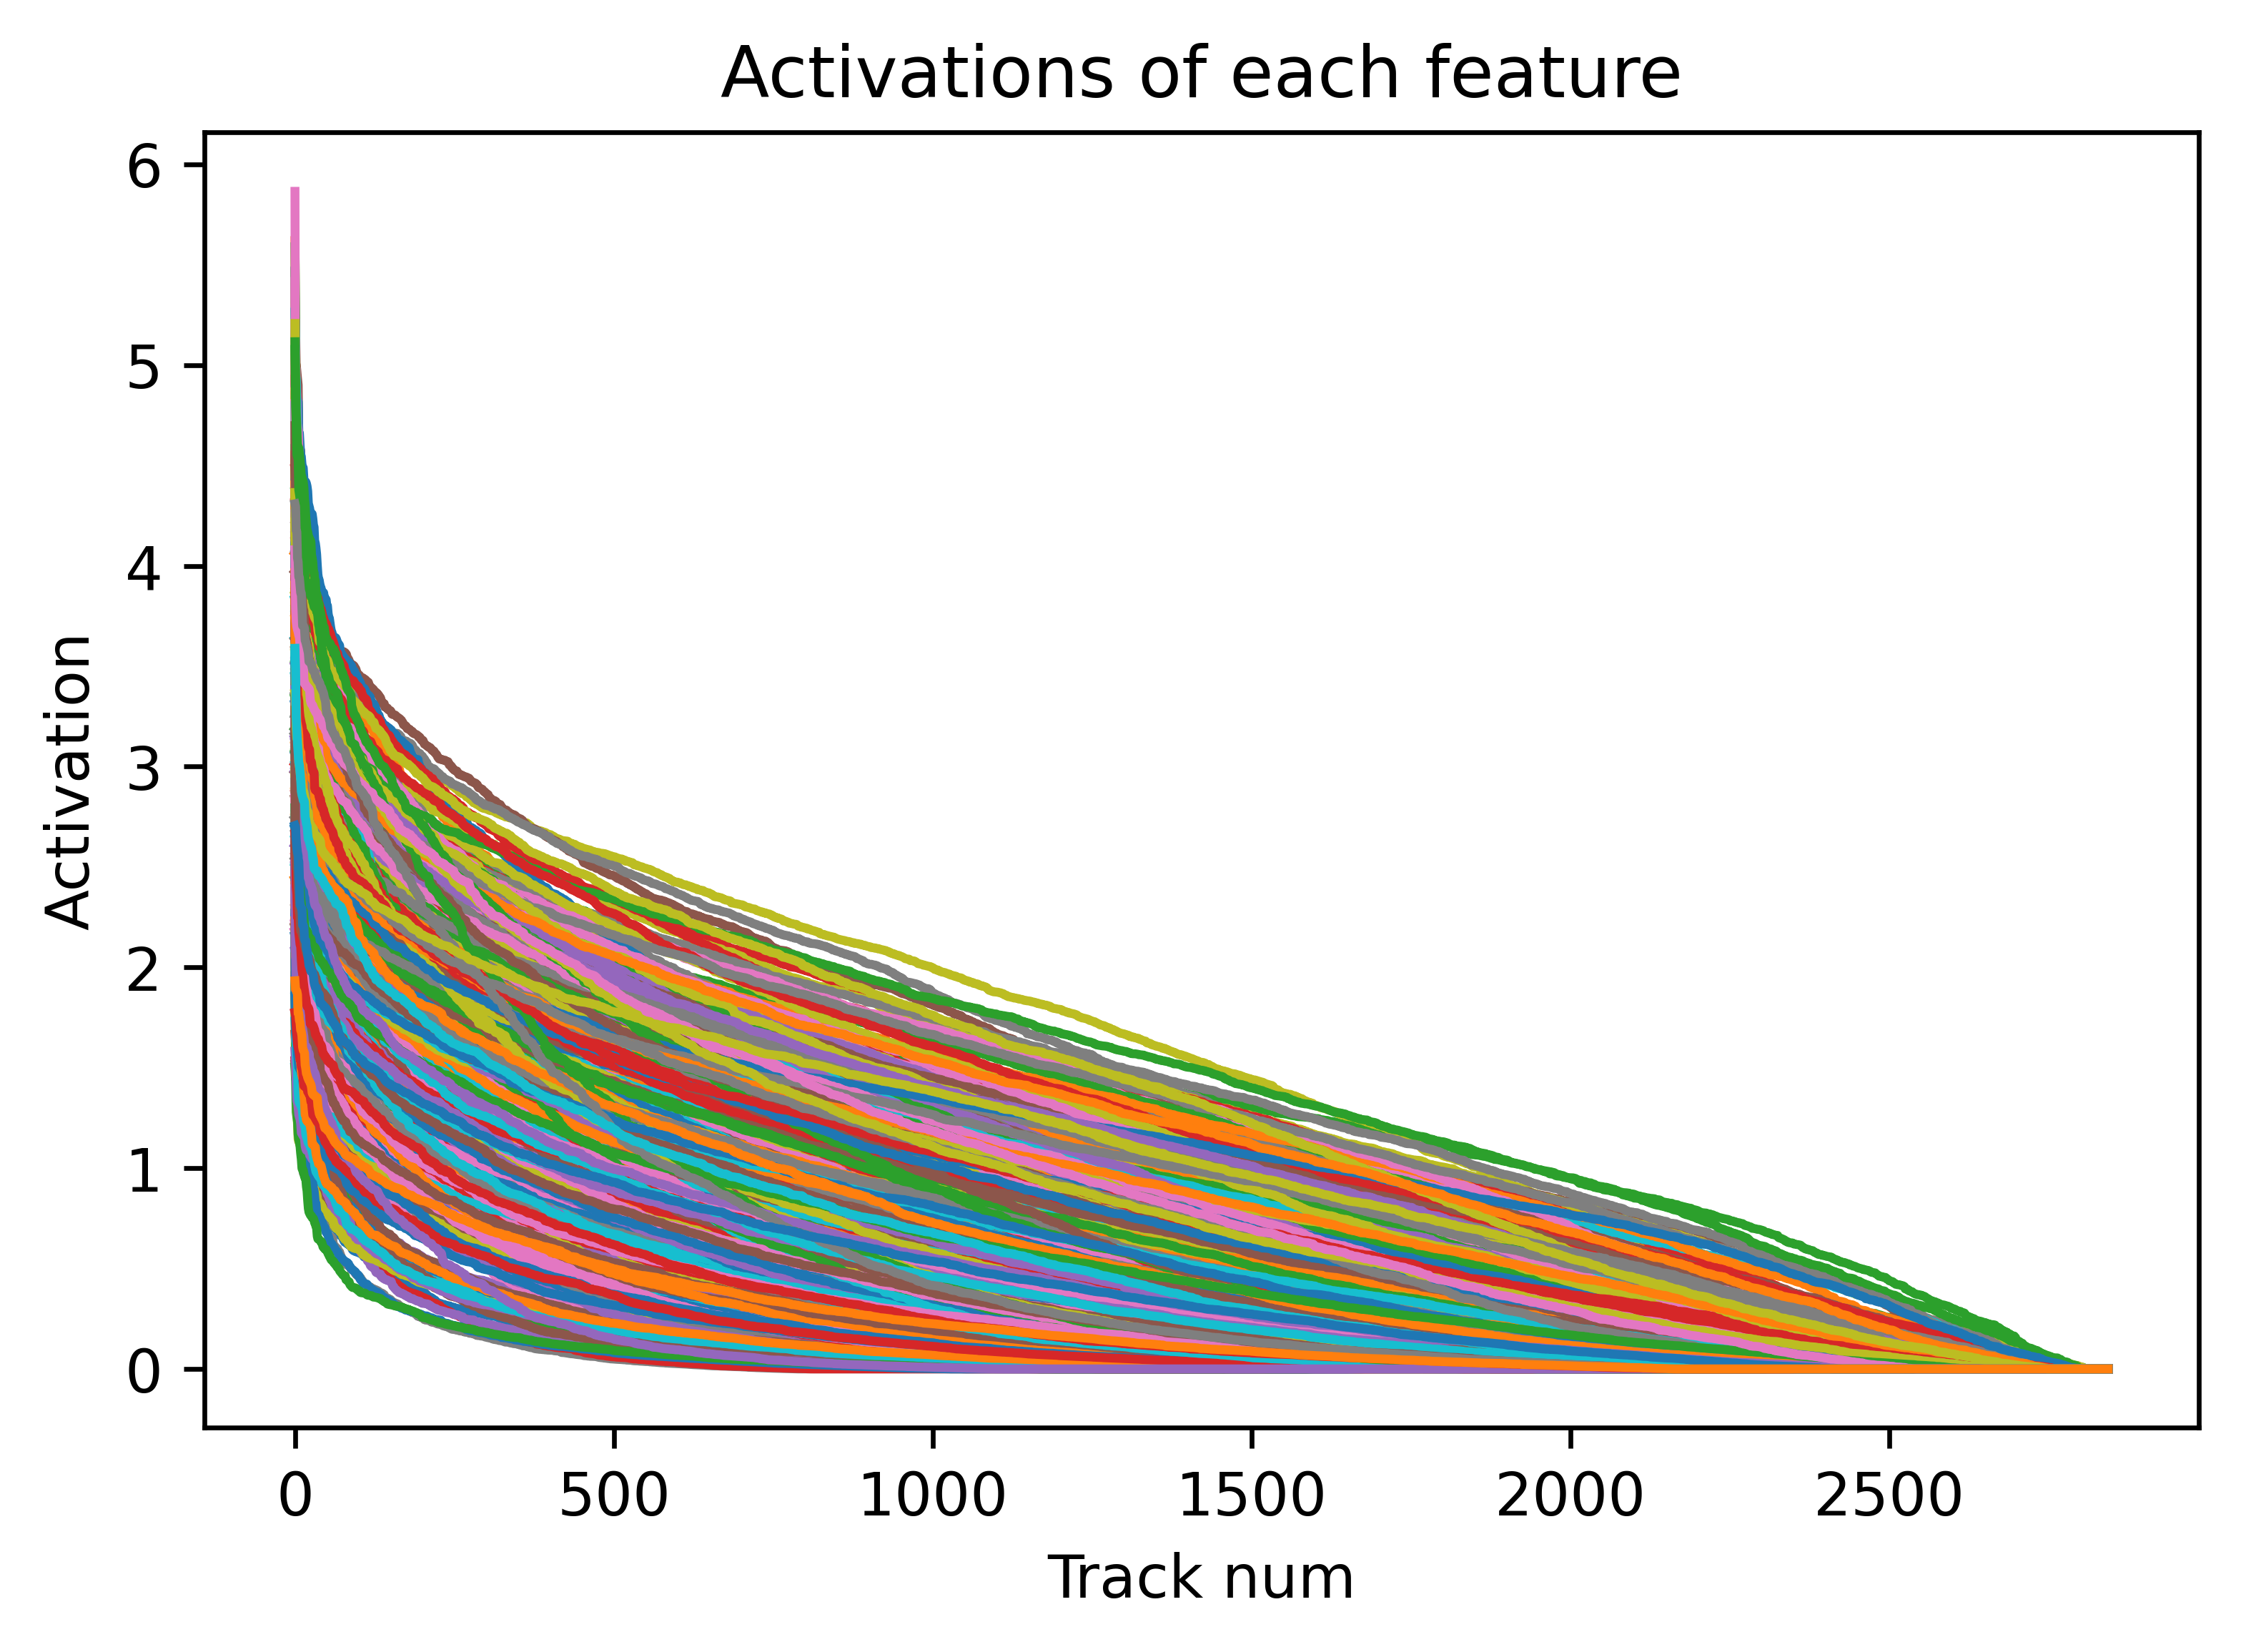

In [157]:
import matplotlib.pyplot as plt
figure = plt.figure(dpi=600)

for feature_num in range(0, 512):
    s = sorted(predictions, key=lambda x: x[1][feature_num], reverse=True)
    features = [f[1][feature_num] for f in s]
    plt.plot(features)
    
plt.title("Activations of each feature")
plt.xlabel("Track num")
plt.ylabel("Activation")
plt.show()

In [158]:
# TSNE

In [159]:
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd

def tsne(features):
    embedding = TSNE().fit_transform(features)
    return embedding

In [162]:
features = [f[1] for f in predictions]
labels = np.array([f[2] for f in predictions])
fps = [os.path.splitext(f[5])[0] + ".wav" for f in predictions]
# lim = 1
# for p in predictions:
#     l = p[6]
#     if 1 in l:
#         idx = [idx for idx, i in enumerate(l) if i == 1]
#         label = ",".join(sorted([test_dataset.tags[idx] for idx in idx])[:lim])
#         labels.append(label)
#     else:
#         labels.append("UNK")
# labels = np.array(labels)

In [163]:
embedding = tsne(features)

In [164]:
figure = plt.figure(figsize=(8, 8), dpi=120)
    # plt.scatter(embedding[:, 0], embedding[:, 1], c=labels.ravel())

labels = labels.squeeze()

d = {"x": embedding[:, 0], "y": embedding[:, 1], "label": labels}
df = pd.DataFrame(data=d)

g = sns.scatterplot(
    x="x",
    y="y",
    hue="label",
    palette=sns.color_palette("hls", len(set(labels))),
#     legend="full",
    data=df,
    alpha=1,
)

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height])  # resize position

# Put a legend to the right side
g.legend(loc="center right", bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.axis("off")
#     plt.savefig(fp, bbox_inches="tight")
plt.show()

ValueError: Image size of 806x74947 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 960x960 with 1 Axes>

In [168]:
import os
import json
import numpy as np
import torchaudio
from tqdm import tqdm
from pathlib import Path
import colorsys

def tsne_to_json(audio_length, dataset, embedding, fps, labels):

    vis_dir = os.path.join("visualisation", "audio")
    if not os.path.exists(vis_dir):
        os.makedirs(vis_dir)

    x, y = embedding[:, 0], embedding[:, 1]

    # between [0, 1]
    x = (x - np.min(x)) / np.ptp(x)
    y = (y - np.min(y)) / np.ptp(y)


    all_d = {}
    all_d["tsne"] = []
    f = {}
    f["names"] = []
    f["filenames"] = []
    f["colors"] = []

    idx = 0
    prev_track = None
    for x, y, fp, label in tqdm(zip(x, y, fps, labels)):
        audio_path = Path(fp)
        track_name = audio_path.stem # _, fp, _ = tracks_list
        c = {}
        c["coordinates"] = [float(x), float(y)]
        all_d["tsne"].append(c)
        f["names"].append(track_name)

        start_idx = idx * audio_length
        f["filenames"].append(str(audio_path))  # dirty fix


#         audio_fp = os.path.join(vis_dir, fn)
#         if not os.path.exists(audio_fp):
#             audio, sr = torchaudio.load(audio_path)
#             audio = audio[:, start_idx : start_idx + audio_length]

#             torchaudio.save(audio_fp, audio, sample_rate=sr)

        idx += 1

        if label != prev_track:
            idx = 0
            prev_track = label.item()


    all_d["names"] = f["names"]
    all_d["filenames"] = f["filenames"]

    color_d = {}
    unique_names = list(set(all_d["names"]))
    colors = _get_colors(len(unique_names))
    for k, v in zip(unique_names, colors):
        color_d[k] = v


    # all unique tracks
    for k in all_d["names"]:
        f["colors"].append(color_d[k])

    all_d["colors"] = f["colors"]

    with open("./validation/visualisation/data.json", "w") as f:
        json.dump(all_d, f, ensure_ascii=False, indent=4)


def _get_colors(num_colors):
    colors = []
    for i in np.arange(0.0, 360.0, 360.0 / num_colors):
        hue = i / 360.0
        lightness = (50 + np.random.rand() * 10) / 100.0
        saturation = (90 + np.random.rand() * 10) / 100.0
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors


In [169]:
tsne_to_json(59049, test_dataset, embedding, fps, labels)

2844it [00:00, 81994.78it/s]
